In [114]:
import geopandas as gpd
from shapely.ops import nearest_points
import matplotlib.pyplot as plt

### Consider only roads 
Motorway -> Motorway
Trunk -> Primary suburban road
Primary -> Primary road (connecting major cities)
Secondary -> Secondary road
Tertiary -> Lower-level road

In [115]:
# Carica i file esportati da QGIS
centroidi = gpd.read_file("C:/Users/vehico/Documents/centroides_ok.geojson")
strade = gpd.read_file("C:/Users/vehico/Documents/strade_ok.geojson")

# Verifica i CRS
print(centroidi.crs, strade.crs)

EPSG:32632 EPSG:32632


In [116]:
# Spatial index per performance
strade_sindex = strade.sindex

In [117]:
def distanza_minima(punto):
    possibili = list(strade_sindex.intersection(punto.bounds))
    if not possibili:
        return None
    sottostrade = strade.iloc[possibili]
    return sottostrade.distance(punto).min()

In [118]:
# Calcolo distanza
centroidi["dist_mainstreets"] = centroidi.geometry.apply(distanza_minima)

In [119]:
# Rimuovi eventuali valori nulli
distanze_valide = centroidi["dist_mainstreets"].dropna()

# Statistiche
media = distanze_valide.mean()
minimo = distanze_valide.min()
massimo = distanze_valide.max()

print(f"📏 Average distance: {media:.2f} m")
print(f"📏 Minimum distance: {minimo:.2f} m")
print(f"📏 Maximum distance: {massimo:.2f} m")


📏 Average distance: 176.00 m
📏 Minimum distance: 0.00 m
📏 Maximum distance: 5332.91 m


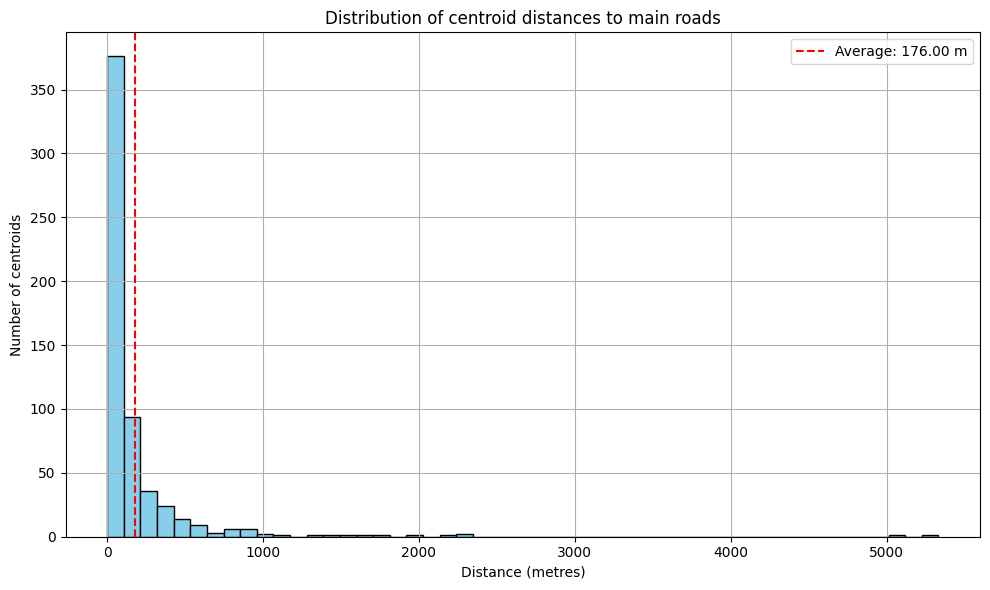

In [120]:
plt.figure(figsize=(10, 6))
plt.hist(distanze_valide, bins=50, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', label=f'Average: {media:.2f} m')
plt.title("Distribution of centroid distances to main roads")
plt.xlabel("Distance (metres)")
plt.ylabel("Number of centroids")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
# Filtra quelli “su” una strada (distanza zero o quasi)
centroidi["on_street"] = centroidi["dist_mainstreets"] < 500  # es. entro 1 metro

In [122]:
# Quanti non stanno su una strada principale?
fuori_strada = centroidi[~centroidi["on_street"]]
print(f"Number of centroids NOT on main road: {len(fuori_strada)} out of {len(centroidi)}")

Number of centroids NOT on main road: 449 out of 989


### Consider also urban roads 
Motorway -> Motorway
Trunk -> Primary suburban road
Primary -> Primary road (connecting major cities)
Secondary -> Secondary road
Tertiary -> Lower-level road
Residential -> Urban residential street

In [127]:
strade_r = gpd.read_file("C:/Users/vehico/Documents/strade_residential.geojson").to_crs(epsg=32632)

In [128]:
# Spatial index per performance
strade_r_sindex = strade_r.sindex

In [129]:
def distanza_minima(punto):
    possibili = list(strade_r_sindex.intersection(punto.bounds))
    if not possibili:
        return None
    sottostrade = strade.iloc[possibili]
    return sottostrade.distance(punto).min()

In [130]:
# Calcolo distanza
centroidi["dist_urbanstreets"] = centroidi.geometry.apply(distanza_minima)

IndexError: positional indexers are out-of-bounds

In [104]:
# Rimuovi eventuali valori nulli
distanze_valide = centroidi["dist_urbanstreets"].dropna()

# Statistiche
media = distanze_valide.mean()
minimo = distanze_valide.min()
massimo = distanze_valide.max()

print(f"📏 Average distance: {media:.2f} m")
print(f"📏 Minimum distance: {minimo:.2f} m")
print(f"📏 Maximum distance: {massimo:.2f} m")


📏 Average distance: 176.00 m
📏 Minimum distance: 0.00 m
📏 Maximum distance: 5332.91 m


In [105]:
# Filtra quelli “su” una strada (distanza zero o quasi)
centroidi["on_urbanstreet"] = centroidi["dist_urbanstreets"] < 500  # es. entro 1 metro

In [106]:
# Quanti non stanno su una strada principale?
fuori_strada = centroidi[~centroidi["on_urbanstreet"]]
print(f"Number of centroids NOT on urbanstreet main road: {len(fuori_strada)} out of {len(centroidi)}")

Number of centroids NOT on urbanstreet main road: 449 out of 989
